# Lung adenocarcinoma dataset analysis - Task 1 to 5



## Analysis developed by:
    João Capela PG38274
    Rui Nunes PG38281

## Task 1 - Description and characterisation of the data

The data herein described is relative to patients with adenocarcinoma of the lung. This type of cancer is the leading cause of death worldwide. For the 230 patients with sigificant differences in gene mutation, aberrations in the genes NF1, MET, ERBB2 and RIT1 are present in 13% of the cases. Also, EGFR mutations were more abundant in female patients, whereas mutations in RBM10 were more frequent in males. Moreover, these genes were enriched in samples lacking an activated oncogene, suggesting a driver role for these events in certain tumours [1].

The "data" dataset contains expression data from the 515 patients involved in the study whereas the "meta_patients" dataset is in regard to several nominal and numeric atributes of each patient.




## Task 2 - Preprocessing of data

In [1]:
# importing the datasets of expression data and metadata
import pandas as pd
import numpy as np
from sklearn import preprocessing

data = pd.read_csv("data_RNA_Seq_v2_expression_median.txt",sep="\t",index_col=1)
meta_patients = pd.read_csv("luad_tcga_clinical_data.tsv",sep="\t",header=0,index_col=2)

# verifying the number of columns and lines of both datasets
meta_patients=meta_patients.drop("Study ID",axis=1) # removing the column "Study ID" of the metadata
print(data.shape)
print(meta_patients.shape)

(20531, 518)
(517, 106)


In [2]:
# sum of the nas in both datasets
print(data.isnull().sum().sum())
print(meta_patients.isnull().sum().sum())


2
25514


In [3]:
# verify if there are genes (lines) with no expression data 
sel_index=data.apply(lambda x: (x==0).all(), axis = 0)
sel_index.index[sel_index]

Index([], dtype='object')

In [2]:
# switch the entrez gene id into the Hugo symbol 
id_converter = {}

for key in data.index:
    id_converter[data.loc[key, "Hugo_Symbol"]]=key


# scaling of the expression data    
data_scaled = preprocessing.scale(data.iloc[:,1:])

data_scaled = pd.DataFrame(data_scaled, index =data.index , columns = data.columns[1:])
print(data_scaled.shape)
data_scaled.describe()



(20531, 517)


,TCGA-05-4244-01,TCGA-05-4249-01,TCGA-05-4250-01,TCGA-05-4382-01,TCGA-05-4384-01,TCGA-05-4389-01,TCGA-05-4390-01,TCGA-05-4395-01,TCGA-05-4396-01,TCGA-05-4397-01,...,TCGA-NJ-A4YG-01,TCGA-NJ-A4YI-01,TCGA-NJ-A4YP-01,TCGA-NJ-A4YQ-01,TCGA-NJ-A55A-01,TCGA-NJ-A55O-01,TCGA-NJ-A55R-01,TCGA-NJ-A7XG-01,TCGA-O1-A52J-01,TCGA-S2-AA1A-01
count,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,...,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04
mean,4.152994e-18,-6.229492e-18,-2.145714e-17,-1.107465e-17,-1.384331e-17,-1.107465e-17,1.245898e-17,-1.384331e-17,-1.522765e-17,4.291428e-17,...,3.183962e-17,-2.768663e-17,-2.353364e-17,1.730414e-17,-2.768663e-18,-1.107465e-17,2.630230e-17,9.690320e-18,1.384331e-17,-6.921657e-18
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,...,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-2.379758e-01,-2.842081e-01,-2.626203e-01,-2.374016e-01,-2.168511e-01,-2.403818e-01,-2.170053e-01,-2.190499e-01,-1.699081e-01,-3.270922e-01,...,-1.642516e-01,-2.230331e-01,-2.491517e-01,-1.646211e-01,-3.036185e-01,-1.810726e-01,-2.682129e-01,-1.131176e-01,-1.543711e-01,-1.410340e-01
25%,-2.362731e-01,-2.821306e-01,-2.611826e-01,-2.352066e-01,-2.151068e-01,-2.388122e-01,-2.161395e-01,-2.184867e-01,-1.689584e-01,-3.247188e-01,...,-1.632408e-01,-2.215395e-01,-2.475431e-01,-1.631929e-01,-2.990303e-01,-1.798631e-01,-2.636506e-01,-1.126076e-01,-1.533358e-01,-1.395579e-01
50%,-1.869794e-01,-2.222808e-01,-2.078085e-01,-1.808513e-01,-1.668470e-01,-1.877570e-01,-1.747213e-01,-1.897625e-01,-1.376212e-01,-2.500801e-01,...,-1.320914e-01,-1.759019e-01,-1.948448e-01,-1.271216e-01,-2.086346e-01,-1.419273e-01,-1.970830e-01,-9.333137e-02,-1.241266e-01,-1.070846e-01
75%,-3.194700e-02,-2.393561e-02,-3.748754e-02,-2.688335e-02,-1.683461e-02,-2.903397e-02,-3.358210e-02,-6.470214e-02,-2.610938e-02,-3.993109e-03,...,-3.097049e-02,-2.123178e-02,-3.330729e-02,-1.620096e-02,1.097588e-02,-2.443665e-02,-1.227663e-02,-2.203986e-02,-2.549846e-02,-2.101192e-02
max,6.888929e+01,4.859775e+01,4.731961e+01,5.039623e+01,9.873500e+01,8.431307e+01,6.340503e+01,7.342163e+01,8.200304e+01,3.874696e+01,...,8.471857e+01,9.757246e+01,5.011805e+01,1.165459e+02,5.436600e+01,8.561694e+01,6.685034e+01,1.094149e+02,1.104419e+02,1.093210e+02


In [5]:
# types of data for each column in the metadata
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)
meta_patients.dtypes


Patient ID                                                                                      object
Diagnosis Age                                                                                  float64
Neoplasm Disease Stage American Joint Committee on Cancer Code                                 float64
Neoplasm American Joint Committee on Cancer Clinical Distant Metastasis M Stage                float64
American Joint Committee on Cancer Metastasis Stage Code                                        object
American Joint Committee on Cancer Lymph Node Stage Code                                       float64
American Joint Committee on Cancer Lymph Node Stage Code.1                                     float64
Neoplasm Disease Lymph Node Stage American Joint Committee on Cancer Code                       object
Neoplasm Disease Stage American Joint Committee on Cancer Code.1                                object
American Joint Committee on Cancer Publication Version Type              

Sex
Female    277
Male      240
dtype: int64


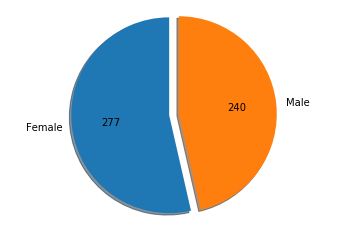

In [6]:
# pie chart of data from patients genre
import matplotlib.pyplot as plt
meta_patients.loc[:,"Sex"]=meta_patients.loc[:,"Sex"].map({'MALE':'Male','Male':'Male','Female':'Female'})
values_sex=meta_patients.groupby("Sex").size()
print(values_sex)
fracs = [277, 240]
total = sum(fracs)
plt.pie(values_sex, labels = values_sex.index,
        autopct= lambda p: '{:.0f}'.format(p * total / 100),
        shadow=True, startangle=90, explode = (0, 0.1))
plt.axis('equal')
plt.show()

American Joint Committee on Cancer Metastasis Stage Code
M0     347
M1      18
M1a      2
M1b      5
MX     141
nan      4
dtype: int64


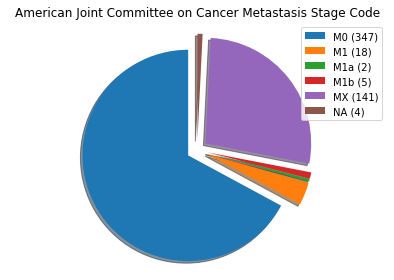

In [7]:
# pie chart encompassing the different stage codes for cancer metastasis

values_metastasis=meta_patients.astype(str).groupby("American Joint Committee on Cancer Metastasis Stage Code").size()
print(values_metastasis)
patches, text= plt.pie(values_metastasis,
        shadow=True, startangle=90, explode = (0.1,0.1,0.1,0.1,0.1,0.1))
labels= ["M0 (347)","M1 (18)","M1a (2)","M1b (5)", "MX (141)", "NA (4)"]
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.title('American Joint Committee on Cancer Metastasis Stage Code')
plt.tight_layout()
plt.show()

American Joint Committee on Cancer Publication Version Type
3rd      3
4th      5
5th     30
6th    188
7th    268
nan     23
dtype: int64


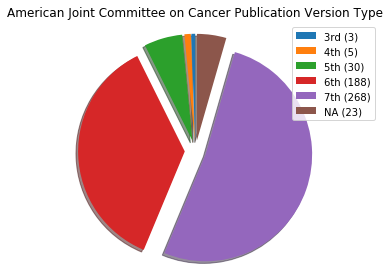

In [8]:
# pie chart from patient's cancer publication version type

print(meta_patients.astype(str).groupby("American Joint Committee on Cancer Publication Version Type").size())
values_ajcc_staging=meta_patients.astype(str).groupby("American Joint Committee on Cancer Publication Version Type").size()
fracs = [3,5,30,188,268,23]
total = sum(fracs)
patches, text= plt.pie(values_ajcc_staging, shadow=True, startangle=90, explode=(0.1,0.1,0.1,0.1,0.1,0.1,))
labels= ["3rd (3)","4th (5)","5th (30)","6th (188)", "7th (268)", "NA (23)"]
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.title('American Joint Committee on Cancer Publication Version Type')
plt.tight_layout()
plt.show()

Patient Smoking History Category
1.0     76
2.0    119
3.0    135
4.0    169
5.0      4
nan     14
dtype: int64


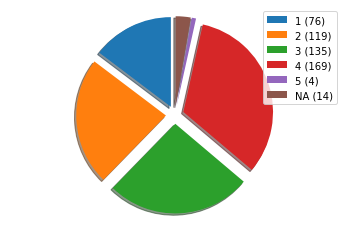

In [9]:
# pie chart for patient smoking history category 

values_smoking_hist=meta_patients.astype(str).groupby("Patient Smoking History Category").size()
print(values_smoking_hist)
patches, text = plt.pie(values_smoking_hist, shadow=True, startangle=90, explode=(0.1,0.1,0.1,0.1,0.1,0.1,))
labels=["1 (76)","2 (119)","3 (135)","4 (169)","5 (4)","NA (14)"]
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.show()

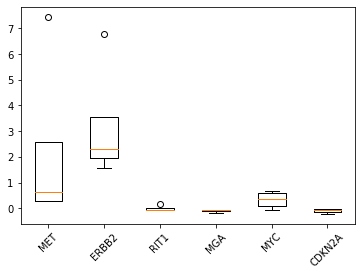

In [10]:
# box plot for the differently expressed genes, reported in the article, of the 5th Patient Smoking History Category 

genes_entrez_id = []
genes = ["MET","ERBB2","RIT1","MGA","MYC","CDKN2A"]
for gene in genes: #entrez gene id for the genes in the list
    genes_entrez_id.append(id_converter[gene]) 

patient= meta_patients[meta_patients.loc[:,"Patient Smoking History Category"]==5].index   # patients with Patient Smoking History Category == 5  
data_scaled.loc[genes_entrez_id,patient]
plt.boxplot(data_scaled.loc[genes_entrez_id,patient])
plt.xticks(range(1,7),genes, rotation=45 )
plt.show()

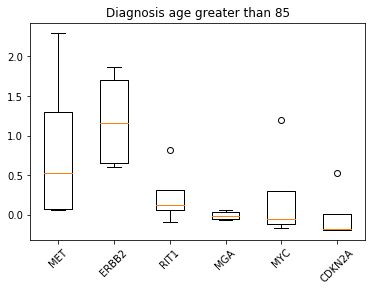

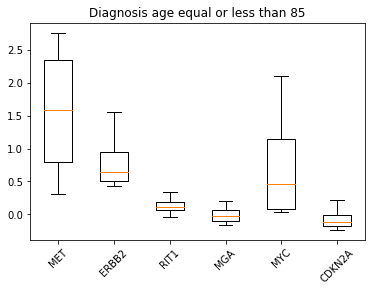

In [11]:
#boxplot for the differently expressed genes, reported in the article, for the patients with Diagnosis age greater than 85

patient= meta_patients[meta_patients.loc[:,"Diagnosis Age"]>85].index    
plt.boxplot(data_scaled.loc[genes_entrez_id,patient])
plt.xticks(range(1,7),genes, rotation=45 )
plt.title("Diagnosis age greater than 85")
plt.show()

#boxplot for the differently expressed genes, reported in the article, for the patients with Diagnosis age equal or less than 85
patient= meta_patients[meta_patients.loc[:,"Diagnosis Age"]<=40].index
plt.boxplot(data_scaled.loc[genes_entrez_id,patient])
plt.xticks(range(1,7),genes, rotation=45 )
plt.title("Diagnosis age equal or less than 85")
plt.show()

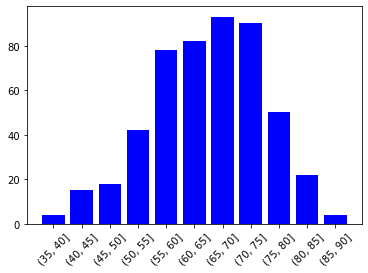

In [12]:
# barplot of the diagnosis age of the patients


df = meta_patients.groupby('Diagnosis Age').size()
bins = pd.cut(meta_patients.loc[:,'Diagnosis Age'], np.arange(35,91,5)) #division of the diagnosis age into groups of 5
df=meta_patients.groupby(bins)['Diagnosis Age'].agg(['count']) # sum of the frequency of each group 

nas = meta_patients.loc[:,'Diagnosis Age'].isnull().sum()
indexes = [str(c) for c in df.index] 
values = [v[0] for v in df.values]


plt.bar(indexes ,values ,color='b')
plt.xticks(indexes, rotation='45')
plt.show()

                         count
Fraction Genome Altered       
(0.0, 0.2]                 212
(0.2, 0.4]                 165
(0.4, 0.6]                  97
(0.6, 0.8]                  31
(0.8, 1.0]                   1


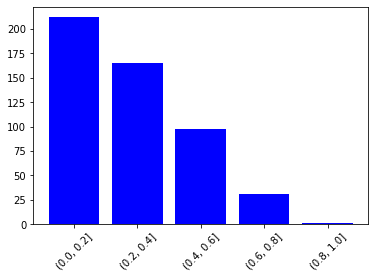

In [13]:
fraction_genome_altered=meta_patients.loc[:,"Fraction Genome Altered"]
df = meta_patients.groupby('Fraction Genome Altered').size()
bins = pd.cut(meta_patients.loc[:,'Fraction Genome Altered'], np.arange(0,1.1,0.2)) #division of the diagnosis age into groups of 5\n",
df=meta_patients.groupby(bins)['Fraction Genome Altered'].agg(['count']) # sum of the frequency of each group \n",
print(df)
nas = meta_patients.loc[:,'Fraction Genome Altered'].isnull().sum()
indexes = [str(c) for c in df.index] 
values = [v[0] for v in df.values]
plt.bar(indexes ,values ,color='b')
plt.xticks(indexes, rotation='45')
plt.show()

In [14]:
#sum of the null values of the scaled expression data
data_scaled.isnull().sum().sum()

0

In [15]:
#the followig code verifies whether there is repeated patients identifiers or not
patients_list = data_scaled.columns.tolist()
res = []
seen = []
for patient in patients_list:
    if patient in seen:
        res.append(patient)
    else:
        seen.append(patient)
print(res)




[]


In [16]:
#number of columns and lines of the metadata dataset
print(meta_patients.shape)

(517, 106)


In [3]:
#the following code verifies whether there are columns filled with only null values 
sel_index=meta_patients.apply(lambda x: (x.isnull()).all(), axis = 0)
labels_with_data = sel_index[sel_index==False].index.tolist()
print(len(labels_with_data))

#subset of the metadata without the columns with no values
meta_patients = meta_patients.loc[:,labels_with_data]
print(meta_patients.shape)
print(data_scaled.shape)


80
(517, 80)
(20531, 517)


In [18]:
quantity_na = meta_patients.apply(lambda x: (x.isnull()).sum(), axis = 0)
print(str(quantity_na[quantity_na!=0].index.size) + " labels with more than one NA") #columns with at least one na
print(str(quantity_na[quantity_na!=0].sum()) + " NAs") #total count of nas in the dataset


59 labels with more than one NA
12072 NAs


## Task 3 - Statistical analysis

In [3]:
# transposition of the scaled dataset of expression data
data_scaled = data_scaled.transpose()

0


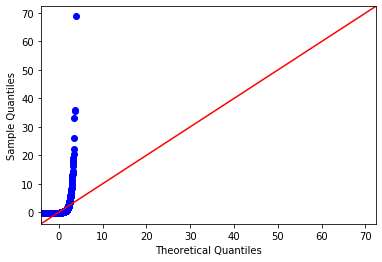

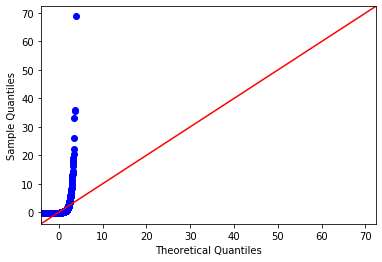

In [20]:
# the following code verifies the normality of the data

from scipy import stats
import statsmodels.api as sm

p_values=[]
for sample in data_scaled.index.tolist():
    w, p_value = stats.shapiro(np.random.choice(data_scaled.loc[sample],500))
    p_values.append(p_value)

counter = 0
for p_value in p_values:
    if p_value>=0.05:
        counter+=1

print(counter)

#qqplot of the data showing the if the data follow a normal distribution
test = data_scaled.iloc[0]
sm.qqplot(test,line='45')



Since no shapiro-test had a p-value greater than 0.05, the null hypothesis cannot be rejected. Thus, it can be concluded that there is no statistically signicative data proving that is normally distributed. This can be further confirmed by the plot, which shows that the data does not follow a normal distribution.


### Differential expression analysis regarding "Patient's Vital Status"

In [21]:
# statistical analysis to verify statistical differences between the different status of the patient's vital status column

patients = data_scaled.index.tolist()
mydata = data_scaled.copy()
mydata.insert(len(mydata.columns),"Patient's Vital Status",meta_patients.loc[:,"Patient's Vital Status"]) #insert a column in the expression dataset with the two values of the Patient's Vital Status 
interest_vital_status = []
for ids in mydata.columns.tolist()[:-1]:
    l_data = {grp: mydata[ids][mydata.loc[:,"Patient's Vital Status"] == grp] for grp in ['Dead', 'Alive']} # aggregate the expression data depending on the two values of the Patient's Vital Status
    f, p = stats.kruskal(l_data['Dead'],l_data['Alive'])
    if p<0.05:
        interest_vital_status.append(ids)

len(interest_vital_status)

12926

Since we had no statistical evidence of the normal distribution of the data, a non parametric test was performed in order to test if there were significant statistical differences between the Patient's Vital Status dead or alive. 12926 genes had a p-value lower than 0.05. Thus, for these genes, the null hypothesis that states that the two groups have the same mean can be rejected hence it can be concluded that there are statistically significant differences between the two groups.

### Differential expression analysis regarding "Patient Smoking History Category"

In [22]:
# statistical analysis to verify statistical differences between the different values of the Patient Smoking History Category

patients = data_scaled.index.tolist()
mydata = data_scaled.copy()
mydata.insert(len(mydata.columns),"Patient Smoking History Category",meta_patients.loc[:,"Patient Smoking History Category"]) ##insert a column in the expression dataset with the five values of the Patient Smoking History Category
interest_smoking = []
for ids in mydata.columns.tolist()[:-1]:
    l_data = {grp: mydata[ids][mydata.loc[:,"Patient Smoking History Category"] == grp] for grp in [1,2,3,4,5]} ## aggregate the expression data depending on the five values of the Patient Smoking History Category
    f, p = stats.kruskal(l_data[1],l_data[2],l_data[4],l_data[3],l_data[5])
    if p<0.05:
        interest_smoking.append(ids)
len(interest_smoking)

4985

In order to test if there were significantly statistical differences between the Patient Smoking History Category 1,2,3,4,5 another Kruskal wallis test was performed. 4985 genes had a p-value lower than 0.05. Thus, for these genes, the null hypothesis that states that the different groups have the same mean can be rejected hence it can be concluded that there are statistically significant differences between the different groups.

In [23]:
# statistical analysis to test differences between each group of the Patient Smoking History Category

import statsmodels.stats.multicomp as multi

mydata = data_scaled.copy()
mydata.insert(len(mydata.columns),"Patient Smoking History Category",meta_patients.loc[:,"Patient Smoking History Category"])
mydata = mydata.dropna()


for i in range(len(genes)):
    if genes_entrez_id[i] in interest_smoking:
        print(genes[i])
        print()
        x = pd.Series(mydata.loc[:,genes_entrez_id[i]].values, dtype=float) # expression data for the 6 differentially expressed genes reported in the article
        y = mydata["Patient Smoking History Category"]
        mcDate = multi.MultiComparison(x,y)
        Results = mcDate.tukeyhsd()
        print(Results)


MYC

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   1.0    2.0    0.149 0.0272  0.0108 0.2872   True
   1.0    3.0   0.0519  0.808 -0.0831 0.1868  False
   1.0    4.0   0.1172 0.0993 -0.0128 0.2472  False
   1.0    5.0   0.2804 0.5036 -0.2024 0.7631  False
   2.0    3.0  -0.0971 0.1644 -0.2155 0.0212  False
   2.0    4.0  -0.0318    0.9 -0.1444 0.0808  False
   2.0    5.0   0.1314    0.9  -0.347 0.6098  False
   3.0    4.0   0.0653 0.4692 -0.0433  0.174  False
   3.0    5.0   0.2285  0.662  -0.249  0.706  False
   4.0    5.0   0.1631 0.8727 -0.3129 0.6392  False
---------------------------------------------------


The results obtained in the tukey test showed there was a p-value lower than 0.05 only between the Patient Smoking History Category 1 and 2. Thus, it can be concluded that for these two categories the null hypothesis can be rejected, hence, existing statistically significant differences.

## Task 4 - PCA

[0.1953991  0.12312076 0.07834776 0.0630992  0.04769104 0.03317883
 0.02893597 0.02607918 0.02292542 0.01995502]


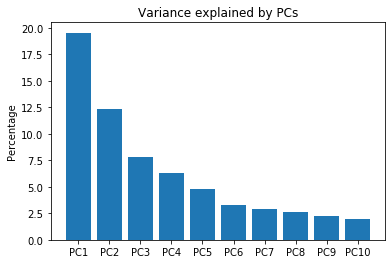

In [24]:
#principal component analysis

from sklearn.decomposition import PCA
n=10 #number of components
pca_data = PCA(n_components=n) 
pca_data.fit(data_scaled) #adjustment of the data to the pca model
x_reduced = pca_data.transform(data_scaled) #reduction of dimensionality of the dataset


#barplot representing the variance explained by PCs 
print(pca_data.explained_variance_ratio_) 
plt.bar(range(n), pca_data.explained_variance_ratio_*100)
plt.xticks(range(n), ['PC'+str(i) for i in range(1,n+1)])
plt.title("Variance explained by PCs")
plt.ylabel("Percentage")
plt.show()

The results obtain in the pca analysis shows that the first principal component explain almost 20% of data variability with the other components explaining a lower percentage.

In [25]:
#necessary components to explain 90% of the data

lst_variance=pca_data.explained_variance_ratio_
accum=0
i=0
while accum<=0.50 and i<len(lst_variance):
    accum+=lst_variance[i]
    i+=1
print(i)
print(accum)

5
0.5076578728930559


The dimensionality reduction showed that 50 % of the data variability is explained by 5 principal components.

### 'Patient's Vital Status'

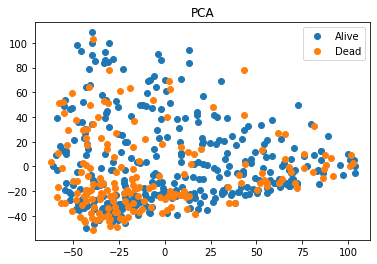

In [26]:
# plot representing the distribuition of the first two principal components for the different values of Patient's Vital Status 

mydata = data_scaled.reset_index(drop=True)
for status in meta_patients.loc[:,'Patient\'s Vital Status'].unique():
    sp = mydata.index[meta_patients.loc[:,'Patient\'s Vital Status']==status]
    plt.plot(x_reduced[sp,0],x_reduced[sp,1], 'o' , label=status)
plt.title("PCA")
plt.legend(loc='best', shadow=False)
plt.show()

The graph above shows that there is no evidence of data separation between the "Dead" and the "Alive" group.

## 'Patient Smoking History Category'

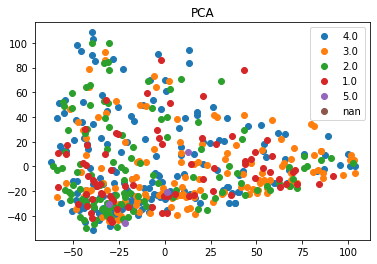

In [27]:
# plot representing the distribuition of the first two principal components for the different values of Patient Smoking History Category


mydata = data_scaled.reset_index(drop=True)
for status in meta_patients.loc[:,'Patient Smoking History Category'].unique():
    sp = mydata.index[meta_patients.loc[:,'Patient Smoking History Category']==status]
    plt.plot(x_reduced[sp,0],x_reduced[sp,1], 'o' , label=status)
plt.title("PCA")
plt.legend(loc='best', shadow=False)
plt.show()

The graph above shows that there is no evidence of data separation between the different categories of the patient smoking history.

## Task 5 - Clustering

In [28]:
# creating an index for the patient's metadata from 0 to 516 and further removing any NA in the "Patient's Vital Status" column
meta_patients.loc[:,"Patient's Vital Status"].index

ind=np.linspace(0,516,517,dtype=int)
mydata_meta=meta_patients.set_index(ind)
mydata_meta=mydata_meta["Patient's Vital Status"].dropna()


[[7.20000000e+01 2.99000000e+02 8.27172739e+02 2.00000000e+00]
 [1.54000000e+02 4.17000000e+02 9.15197839e+02 2.00000000e+00]
 [3.90000000e+01 4.77000000e+02 9.31399310e+02 2.00000000e+00]
 ...
 [4.18000000e+02 1.02900000e+03 3.61391987e+03 5.15000000e+02]
 [9.00000000e+00 1.03000000e+03 3.70393870e+03 5.16000000e+02]
 [3.44000000e+02 1.03100000e+03 4.01641895e+03 5.17000000e+02]]


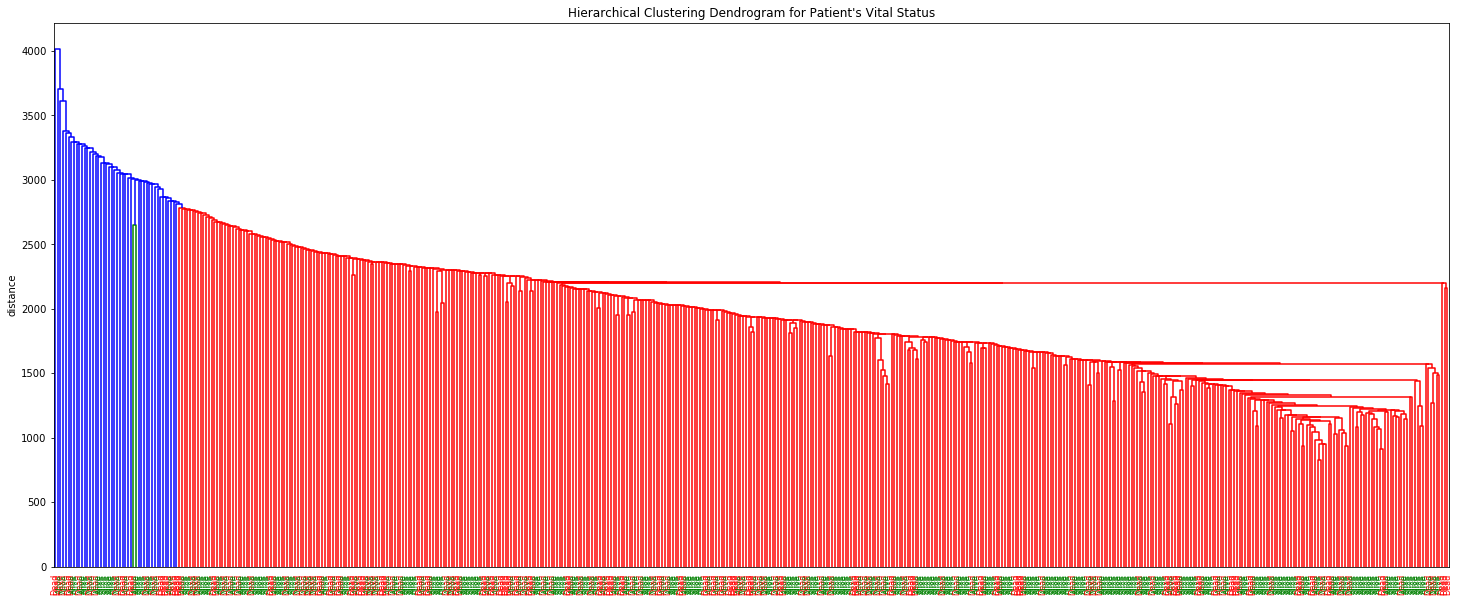

In [29]:
# hierarchical clustering of the data from the Patient's Vital Status with the Manhattan distance and resulting tree 
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(data_scaled.iloc[mydata_meta.index,:], metric="cityblock")
print(Z)
plt.figure(figsize=(25, 10))
dendrogram(
    Z,
    labels=list(mydata_meta),
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)

plt.title("Hierarchical Clustering Dendrogram for Patient\'s Vital Status")
plt.ylabel('distance')

label_colors = {'Dead': 'r', 'Alive': 'g'}
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

plt.show()

The hierarchical clustering results show that there is no evident separation between clusters, neither between the groups "Dead" and "Alive".

In [30]:
# K-means clustering with k=2

from sklearn.cluster import KMeans

k=2
kmeans_data = KMeans(n_clusters=k, max_iter=1000)
kmeans_data.fit(data_scaled) #adjustment of the data to the clustering model
labels =  kmeans_data.labels_
centroids = kmeans_data.cluster_centers_

pd.crosstab(labels,meta_patients.loc[:,"Patient's Vital Status"], rownames=['clusters'] )


Patient's Vital Status,Alive,Dead
clusters,,
0,143,53
1,187,134


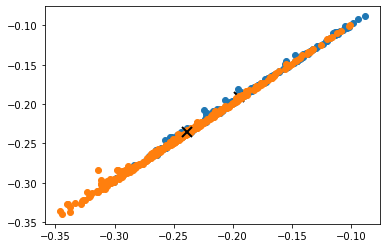

In [31]:
for i in range(k):
    ds = data_scaled.values[np.where(labels==i)]
    plt.plot(ds[:,0],ds[:,1],'o')
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    plt.setp(lines,ms=10.0)   
    plt.setp(lines,mew=2.0)   
plt.show()

The graph and the table represented above show that there is no evident separation between clusters, neither between the groups "Dead" and "Alive".

In [32]:
# creating an index for the patient's metadata from 0 to 516 and further removing any na in the "Patient Smoking History Category" column

ind=np.linspace(0,516,517,dtype=int)
mydata_meta=meta_patients.set_index(ind)
mydata_meta=mydata_meta["Patient Smoking History Category"].dropna()
mydata_meta


0      4.0
1      3.0
2      4.0
3      4.0
4      3.0
      ... 
512    4.0
513    3.0
514    3.0
515    3.0
516    3.0
Name: Patient Smoking History Category, Length: 503, dtype: float64

[[7.20000000e+01 2.85000000e+02 8.27172739e+02 2.00000000e+00]
 [1.42000000e+02 4.03000000e+02 9.15197839e+02 2.00000000e+00]
 [3.90000000e+01 4.63000000e+02 9.31399310e+02 2.00000000e+00]
 ...
 [4.04000000e+02 1.00100000e+03 3.61391987e+03 5.01000000e+02]
 [9.00000000e+00 1.00200000e+03 3.70393870e+03 5.02000000e+02]
 [3.30000000e+02 1.00300000e+03 4.01641895e+03 5.03000000e+02]]


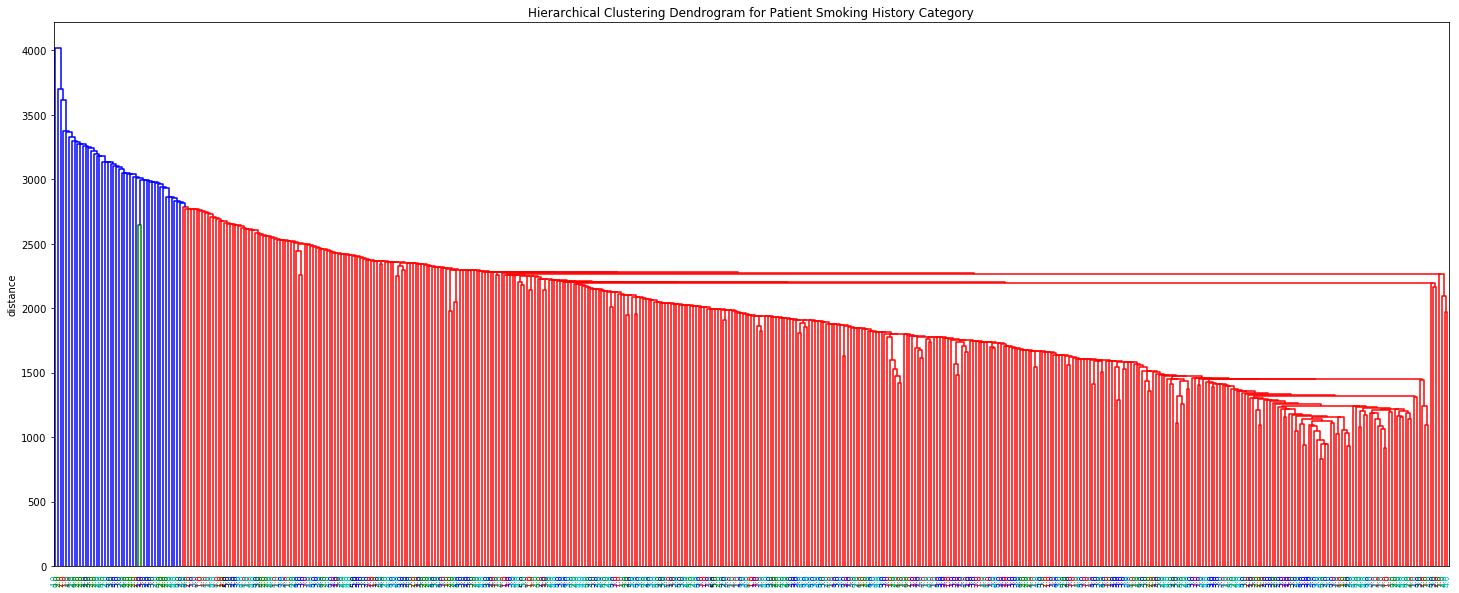

In [33]:
# hierarchical cluter of the data from the Patient Smoking History Category with the Manhattan distance and resulting tree 

from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(data_scaled.iloc[mydata_meta.index,:], metric="cityblock")
print(Z)
plt.figure(figsize=(25, 10))
dendrogram(
    Z,
    labels=list(mydata_meta),
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)

plt.title("Hierarchical Clustering Dendrogram for Patient Smoking History Category")
plt.ylabel('distance')

label_colors = {1.0: 'r', 2.0: 'g', 3.0:'b', 4.0:'c', 5.0: 'k'}
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[float(lbl.get_text())])

plt.show()

The hierarchical clustering results show that there is no evident separation between clusters, neither between the groups.

In [34]:
#k-means clustering with k=5
k=5
kmeans_data = KMeans(n_clusters=k, max_iter=1000)
kmeans_data.fit(data_scaled) #adjustment of the data to the clustering model
labels =  kmeans_data.labels_
centroids = kmeans_data.cluster_centers_

pd.crosstab(labels,meta_patients.loc[:,"Patient Smoking History Category"], rownames=['clusters'] )

Patient Smoking History Category,1.0,2.0,3.0,4.0,5.0
clusters,,,,,
0,11,27,17,39,0
1,16,15,31,21,0
2,19,45,35,57,1
3,13,14,38,30,1
4,17,18,14,22,2


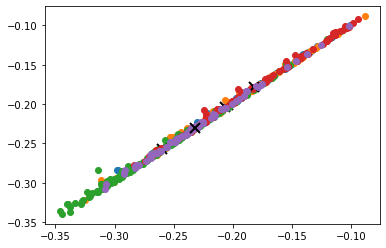

In [35]:
for i in range(k):
    ds = data_scaled.values[np.where(labels==i)]
    plt.plot(ds[:,0],ds[:,1],'o')
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    plt.setp(lines,ms=10.0)   
    plt.setp(lines,mew=2.0)
plt.show()
   


The graph and the table represented above show that there is no evident separation between clusters, neither between the groups.

# Machine learning 

## Linear endpoint

For the linear endpoint it was thought to be important the prediction of the fraction genome altered. This variable presents a linear spectrum of floats ranging from 0.0 and 0.8013. With machine learnig, one can predict the degree of dna mutated, providing additional information related to patients with lung adenocarcinoma. 

In [4]:
data_scaled_ref_lin=data_scaled.loc[meta_patients["Fraction Genome Altered"].dropna().index,:]

data_scaled_ref_lin=data_scaled_ref_lin.loc[-meta_patients["Sex"].isna(),:]
sex = meta_patients.loc[data_scaled_ref_lin.index,"Sex"]
sex=sex.replace("Male",1)
sex=sex.replace("MALE",1)
sex=sex.replace("Female",0)
data_scaled_ref_lin['Sex']=sex

def var_converter(var):
    dic={}
    c = 0
    for i in var.index:
        if var[i] not in dic.keys():
            dic[var[i]]=dic.get(var[i],c+1)
            c+=1
            var[i]=c
        else:
            var[i]=dic[var[i]]




labels_lin = ["Diagnosis Age",'American Joint Committee on Cancer Metastasis Stage Code',
            'American Joint Committee on Cancer Metastasis Stage Code', 
            'Neoplasm Disease Lymph Node Stage American Joint Committee on Cancer Code',
            'American Joint Committee on Cancer Tumor Stage Code', 
            'Prior Cancer Diagnosis Occurence','ICD-10 Classification',"Overall Survival (Months)", 'Patient Primary Tumor Site',
            'Tissue Source Site','Neoplasm Disease Stage American Joint Committee on Cancer Code.1', 
            'Patient Smoking History Category']

for label in labels_lin:
    data_scaled_ref_lin = data_scaled_ref_lin.loc[-meta_patients[label].isna(),:]
    label_var = meta_patients.loc[data_scaled_ref_lin.index,label]
    if type(meta_patients[label].tolist()[0])==str:
        var_converter(label_var)
    data_scaled_ref_lin[label]=label_var

data_scaled_ref_lin

Entrez_Gene_Id,100130426,100133144,100134869,10357,10431,136542,155060,26823,280660,317712,...,American Joint Committee on Cancer Metastasis Stage Code,Neoplasm Disease Lymph Node Stage American Joint Committee on Cancer Code,American Joint Committee on Cancer Tumor Stage Code,Prior Cancer Diagnosis Occurence,ICD-10 Classification,Overall Survival (Months),Patient Primary Tumor Site,Tissue Source Site,Neoplasm Disease Stage American Joint Committee on Cancer Code.1,Patient Smoking History Category
Sample ID,,,,,,,,,,,,,,,,,,,,,
TCGA-05-4244-01,-0.237976,-0.235534,-0.235224,-0.225879,-0.030925,-0.237976,-0.153776,-0.237720,-0.237976,-0.237976,...,1,1,1,1,1,0.00,1,1,1,4.0
TCGA-05-4249-01,-0.284208,-0.281997,-0.280385,-0.256397,-0.000292,-0.284208,-0.239593,-0.283713,-0.284208,-0.284208,...,2,2,1,1,1,50.03,1,1,2,3.0
TCGA-05-4250-01,-0.262620,-0.260657,-0.260989,-0.249197,0.046482,-0.262620,-0.248603,-0.262620,-0.262620,-0.262620,...,2,3,2,1,1,3.98,1,1,3,4.0
TCGA-05-4382-01,-0.237402,-0.234666,-0.235573,-0.217408,-0.042566,-0.237402,-0.179465,-0.237286,-0.237344,-0.237402,...,2,2,1,2,2,19.94,2,1,2,4.0
TCGA-05-4384-01,-0.216851,-0.216084,-0.216020,-0.199591,-0.083119,-0.216851,-0.151584,-0.216706,-0.216851,-0.216851,...,2,1,1,2,1,13.99,1,1,3,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-NJ-A55O-01,-0.181073,-0.178148,-0.176740,-0.162191,-0.016355,-0.181073,-0.132801,-0.180853,-0.181073,-0.181073,...,2,3,6,1,2,0.43,3,29,7,4.0
TCGA-NJ-A55R-01,-0.268213,-0.265791,-0.265243,-0.246717,-0.047634,-0.268213,-0.161691,-0.268006,-0.268213,-0.268213,...,3,2,6,1,2,19.81,2,29,4,3.0
TCGA-NJ-A7XG-01,-0.113118,-0.108331,-0.104085,-0.103611,-0.037644,-0.113118,-0.075840,-0.113118,-0.113118,-0.113118,...,2,3,4,1,2,20.27,2,29,3,3.0


In [37]:
from numpy import amax, amin
print("max: ", amax(meta_patients.loc[data_scaled_ref_lin.index,"Fraction Genome Altered"].values))
print("min: ", amin(meta_patients.loc[data_scaled_ref_lin.index,"Fraction Genome Altered"].values))

max:  0.8013
min:  0.0


In [5]:
indices_lin = np.random.permutation(data_scaled_ref_lin.index)

input_data_lin=data_scaled_ref_lin.values
output_data_lin=meta_patients["Fraction Genome Altered"].values

train_in_lin = data_scaled_ref_lin.loc[indices_lin[:-100]].values
train_out_lin = meta_patients.loc[indices_lin[:-100],"Fraction Genome Altered"].values

test_in_lin  = data_scaled_ref_lin.loc[indices_lin[-100:]].values
test_out_lin = meta_patients.loc[indices_lin[-100:],"Fraction Genome Altered"].values

In [40]:
import pandas as pd  
import numpy as np  
import sklearn as sklearn
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

regressor = LinearRegression()  
regressor.fit(train_in_lin, train_out_lin) #training the algorithm
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)
y_pred = regressor.predict(test_in_lin)
df = pd.DataFrame({'Actual': test_out_lin.flatten(), 'Predicted': y_pred.flatten()})
df



0.44762858166404196
[ 1.28985433e-06  5.27292492e-05  8.36498880e-06 ... -7.36193369e-04
  1.12669456e-03  6.00519278e-03]


,Actual,Predicted
0,0.5598,0.199950
1,0.0648,0.075925
2,0.1960,0.212797
3,0.3046,0.118476
4,0.1241,0.361120
5,0.7107,0.400753
6,0.0369,0.127517
7,0.3267,0.246601
8,0.6545,0.818636
9,0.0339,0.037308


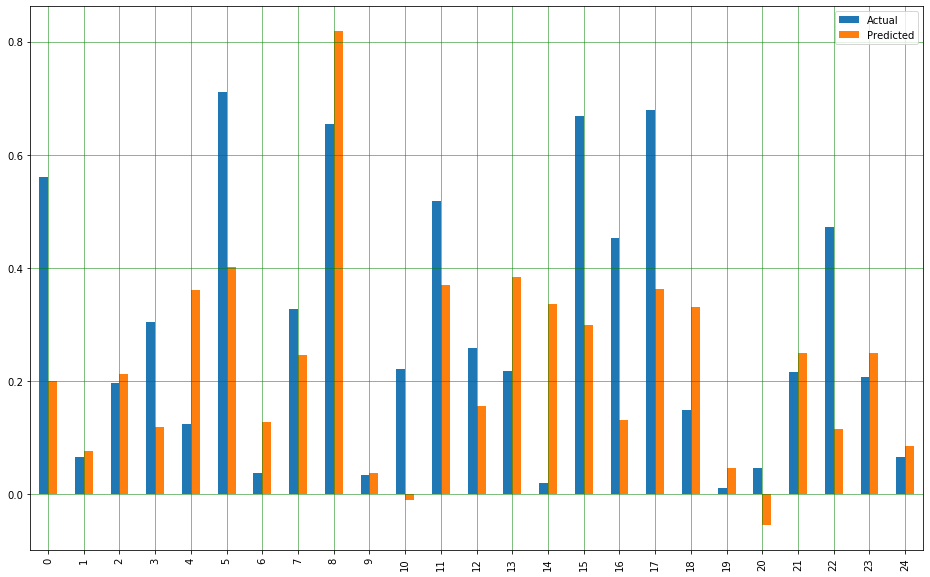

In [41]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [42]:
print('Mean Absolute Error:', metrics.mean_absolute_error(test_out_lin, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(test_out_lin, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_out_lin, y_pred)))

Mean Absolute Error: 0.13528943190031964
Mean Squared Error: 0.03006676311250918
Root Mean Squared Error: 0.17339770215463982


With the Mean Square Error (MSE) one can verify how close the regression line is to a set of points. Smaller MSE means that the regression is closer to the best fit, hence a MSE of 0.0265 suggests an adequate regression by the model

## Binary Endpoint

## Disease Free Status (binary endpoint)

Relative to the binary endpoint, the Disease Free Status was thought to be an important variable comprising of the 'DiseaseFree' and 'Recurred/Progressed' values. Predicting these values can be relevant since it provides information relative to the status of the patient's disease after treatment further revealing whether the patient is cured or not.   

### Data preparation

In [4]:
from copy import deepcopy
data_scaled_ref_bin=data_scaled.loc[meta_patients["Disease Free Status"].dropna().index,:]

data_scaled_ref_bin=data_scaled_ref_bin.loc[-meta_patients["Sex"].isna(),:]
sex = meta_patients.loc[data_scaled_ref_bin.index,"Sex"]
sex=sex.replace("Male",1)
sex=sex.replace("MALE",1)
sex=sex.replace("Female",0)
data_scaled_ref_bin['Sex']=sex


def var_converter(var):
    dic={}
    c = 0
    for i in var.index:
        if var[i] not in dic.keys():
            dic[var[i]]=dic.get(var[i],c+1)
            c+=1
            var[i]=c
        else:
            var[i]=dic[var[i]]


labels_bin = ["Diagnosis Age",'American Joint Committee on Cancer Metastasis Stage Code',
            'American Joint Committee on Cancer Metastasis Stage Code', 
            'Neoplasm Disease Lymph Node Stage American Joint Committee on Cancer Code',
            'American Joint Committee on Cancer Tumor Stage Code', 
            'Prior Cancer Diagnosis Occurence','ICD-10 Classification',"Overall Survival (Months)", 'Patient Primary Tumor Site',
            'Tissue Source Site','Neoplasm Disease Stage American Joint Committee on Cancer Code.1', 
            'Patient Smoking History Category', 'Fraction Genome Altered']

for label in labels_bin:
    data_scaled_ref_bin = data_scaled_ref_bin.loc[-meta_patients[label].isna(),:]
    label_var = meta_patients.loc[data_scaled_ref_bin.index,label]
    if type(meta_patients[label].tolist()[0])==str:
        var_converter(label_var)
    data_scaled_ref_bin[label]=label_var
        
data_scaled_ref_bin


Entrez_Gene_Id,100130426,100133144,100134869,10357,10431,136542,155060,26823,280660,317712,...,Neoplasm Disease Lymph Node Stage American Joint Committee on Cancer Code,American Joint Committee on Cancer Tumor Stage Code,Prior Cancer Diagnosis Occurence,ICD-10 Classification,Overall Survival (Months),Patient Primary Tumor Site,Tissue Source Site,Neoplasm Disease Stage American Joint Committee on Cancer Code.1,Patient Smoking History Category,Fraction Genome Altered
Sample ID,,,,,,,,,,,,,,,,,,,,,
TCGA-05-4244-01,-0.237976,-0.235534,-0.235224,-0.225879,-0.030925,-0.237976,-0.153776,-0.237720,-0.237976,-0.237976,...,1,1,1,1,0.00,1,1,1,4.0,0.4565
TCGA-05-4249-01,-0.284208,-0.281997,-0.280385,-0.256397,-0.000292,-0.284208,-0.239593,-0.283713,-0.284208,-0.284208,...,2,1,1,1,50.03,1,1,2,3.0,0.2221
TCGA-05-4382-01,-0.237402,-0.234666,-0.235573,-0.217408,-0.042566,-0.237402,-0.179465,-0.237286,-0.237344,-0.237402,...,2,1,2,2,19.94,2,1,2,4.0,0.0854
TCGA-05-4384-01,-0.216851,-0.216084,-0.216020,-0.199591,-0.083119,-0.216851,-0.151584,-0.216706,-0.216851,-0.216851,...,1,1,2,1,13.99,1,1,3,3.0,0.0661
TCGA-05-4389-01,-0.240382,-0.239397,-0.236988,-0.224043,0.090155,-0.240382,-0.229229,-0.240299,-0.240382,-0.240382,...,2,2,1,2,44.97,3,1,4,3.0,0.4579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-NJ-A55O-01,-0.181073,-0.178148,-0.176740,-0.162191,-0.016355,-0.181073,-0.132801,-0.180853,-0.181073,-0.181073,...,4,6,1,2,0.43,3,29,7,4.0,0.0194
TCGA-NJ-A55R-01,-0.268213,-0.265791,-0.265243,-0.246717,-0.047634,-0.268213,-0.161691,-0.268006,-0.268213,-0.268213,...,2,6,1,2,19.81,2,29,4,3.0,0.0760
TCGA-NJ-A7XG-01,-0.113118,-0.108331,-0.104085,-0.103611,-0.037644,-0.113118,-0.075840,-0.113118,-0.113118,-0.113118,...,4,3,1,2,20.27,2,29,3,3.0,0.4205


In [5]:
from sklearn.preprocessing import LabelEncoder


indices_bin = np.random.permutation(data_scaled_ref_bin.index)

input_data_bin=data_scaled_ref_bin.values
output_data_bin_=meta_patients.loc[data_scaled_ref_bin.index,"Disease Free Status"].values

train_in_bin = data_scaled_ref_bin.loc[indices_bin[:-50]].values
train_out_bin = meta_patients.loc[indices_bin[:-50],"Disease Free Status"].values

test_in_bin  = data_scaled_ref_bin.loc[indices_bin[-50:]].values
test_out_bin = meta_patients.loc[indices_bin[-50:],"Disease Free Status"].values

labelencoder_Y = LabelEncoder()
train_out_bin = labelencoder_Y.fit_transform(train_out_bin.astype(str))
test_out_bin = labelencoder_Y.fit_transform(test_out_bin.astype(str))
output_data_bin = labelencoder_Y.fit_transform(output_data_bin_.astype(str))

In [45]:
# print(output_data_bin)
unique, counts = np.unique(output_data_bin_, return_counts=True)
dict(zip(unique, counts))

{'DiseaseFree': 231, 'Recurred/Progressed': 160}

Since there is a relative discrepancy between the size of the two values we were not sure if the accuracy would be the best metric to evaluate the models, hence other metrics such as recall, precision and f1 were taken into account. Moreover, for the cross validation the scoring metric 'f1' was used, since it was concluded to be a good metric to assess the model scoring with a binary endpoint  

### Approach: K Nearest Neighbors Classifier

In [46]:
import sklearn as sk
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import classification_report

#KNeighbors model
knn = KNeighborsClassifier()
knn.fit(train_in_bin, train_out_bin)
prev = knn.predict(test_in_bin)

print ("PECC: ", sum([str(prev[i])==(str(test_out_bin[i])) for i in range(len(prev))])/len(prev) *100)
print()
print(" Confusion Matrix ")
print(sk.metrics.confusion_matrix(test_out_bin, prev, labels=None, sample_weight=None))
print(classification_report(test_out_bin,prev))

#model evaluation using the cross validation method
scores_cv_knn = cross_val_score(knn, input_data_bin, output_data_bin, cv = 5, scoring='f1')
print("cross validation mean f1 score: ",scores_cv_knn.mean())



PECC:  68.0

 Confusion Matrix 
[[21  9]
 [ 7 13]]
              precision    recall  f1-score   support

           0       0.75      0.70      0.72        30
           1       0.59      0.65      0.62        20

    accuracy                           0.68        50
   macro avg       0.67      0.68      0.67        50
weighted avg       0.69      0.68      0.68        50

cross validation mean f1 score:  0.47244755244755243


### Bagging KNN

In [47]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

#ensemble bagging KNeighbors
bagged_knn = BaggingClassifier(KNeighborsClassifier(),max_samples=0.8, max_features=0.8)
scores_bag_knn = cross_val_score(bagged_knn, input_data_bin, output_data_bin, cv = 5, scoring='f1')

print("cross validation mean f1 score: ", scores_bag_knn.mean())

cross validation mean f1 score:  0.49205940223693556


### Approach: Decision Tree

In [48]:
from sklearn import tree

#Decision tree model
tree_model = tree.DecisionTreeClassifier()
tree_model = tree_model.fit(train_in_bin, train_out_bin)
prev = tree_model.predict(test_in_bin)

print ("PECC: ", sum([str(prev[i])==(str(test_out_bin[i])) for i in range(len(prev))])/len(prev) *100)
print(" Confusion Matrix ")
print(sk.metrics.confusion_matrix(test_out_bin, prev, labels=None, sample_weight=None))

print(classification_report(test_out_bin,prev))

#model evaluation using the cross validation method
scores_cv_tree = cross_val_score(tree_model, input_data_bin, output_data_bin, cv = 5,scoring='f1')
print("cross validation mean f1 score: ",scores_cv_tree.mean())


PECC:  46.0
 Confusion Matrix 
[[15 15]
 [12  8]]
              precision    recall  f1-score   support

           0       0.56      0.50      0.53        30
           1       0.35      0.40      0.37        20

    accuracy                           0.46        50
   macro avg       0.45      0.45      0.45        50
weighted avg       0.47      0.46      0.46        50

cross validation mean f1 score:  0.41942409748217313


In [49]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score

#ensemble bagging Decision Tree

bagged_dt = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.8, max_features=0.8)
scores_bag_dt = cross_val_score(bagged_dt, input_data_bin, output_data_bin, cv = 5,scoring='f1')

print("cross validation mean f1 score: ", scores_bag_dt.mean())

cross validation mean f1 score:  0.3539455110563364


### Approach: Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

#ensemble random forest

rf_model = RandomForestClassifier(n_estimators=100)
scores_rf = cross_val_score(rf_model, input_data_bin, output_data_bin, cv = 5,scoring='f1')

print ("cross validation mean f1 score: ", scores_rf.mean())


cross validation mean f1 score:  0.32297511621547714


### Approach: Support Vector Machine (SVM)

In [51]:
from sklearn import svm

svm_model = svm.SVC(gamma = "scale")
svm_model.fit(train_in_bin, train_out_bin)
prev = svm_model.predict(test_in_bin)
print(svm_model.score(test_in_bin, test_out_bin))
print()
print(" Confusion Matrix ")
print(sk.metrics.confusion_matrix(test_out_bin, prev, labels=None, sample_weight=None))
print(classification_report(test_out_bin,prev))

scores_cv_svm=cross_val_score(svm_model, input_data_bin, y = output_data_bin, cv = 5,scoring='f1')
print("cross validation mean f1 score: ",scores_cv_svm.mean())

0.58

 Confusion Matrix 
[[29  1]
 [20  0]]
              precision    recall  f1-score   support

           0       0.59      0.97      0.73        30
           1       0.00      0.00      0.00        20

    accuracy                           0.58        50
   macro avg       0.30      0.48      0.37        50
weighted avg       0.36      0.58      0.44        50

cross validation mean f1 score:  0.10130718954248366


### Approach: Gaussian Model (Naive-Bayes)

In [52]:
from sklearn.naive_bayes import GaussianNB

#GaussianNB model
gnb_model = GaussianNB()
gnb_model = gnb_model.fit(train_in_bin, train_out_bin)
prev = gnb_model.predict(test_in_bin)
print(gnb_model)


print ("PECC: ", sum([str(prev[i])==(str(test_out_bin[i])) for i in range(len(prev))])/len(prev) *100)
print()
print(" Confusion Matrix ")
print(sk.metrics.confusion_matrix(test_out_bin, prev, labels=None, sample_weight=None))
print(classification_report(test_out_bin,prev))

#model evaluation using the cross validation method
scores_cv_gnb=cross_val_score(gnb_model, input_data_bin, y = output_data_bin, cv = 5,scoring='f1')
print("cross validation mean f1 score: ",scores_cv_gnb.mean())




GaussianNB(priors=None, var_smoothing=1e-09)
PECC:  60.0

 Confusion Matrix 
[[19 11]
 [ 9 11]]
              precision    recall  f1-score   support

           0       0.68      0.63      0.66        30
           1       0.50      0.55      0.52        20

    accuracy                           0.60        50
   macro avg       0.59      0.59      0.59        50
weighted avg       0.61      0.60      0.60        50

cross validation mean f1 score:  0.47396830742180224


### Approach: Logistic regression 

In [53]:
from sklearn import linear_model

#logistic regression model
logistic = linear_model.LogisticRegression(solver='newton-cg', multi_class='multinomial', random_state=2)
logistic = logistic.fit(train_in_bin, train_out_bin)
prev = logistic.predict(test_in_bin)

print ("PECC: ", sum([str(prev[i])==(str(test_out_bin[i])) for i in range(len(prev))])/len(prev) *100)
print()
print(" Confusion Matrix ")
print(sk.metrics.confusion_matrix(test_out_bin, prev, labels=None, sample_weight=None))
print(classification_report(test_out_bin,prev))

#model evaluation using the cross validation method
scores_cv_logistic=cross_val_score(logistic, input_data_bin, y = output_data_bin, cv = 5,scoring='f1')
print("cross validation mean f1 score: ",scores_cv_logistic.mean())



PECC:  56.00000000000001

 Confusion Matrix 
[[22  8]
 [14  6]]
              precision    recall  f1-score   support

           0       0.61      0.73      0.67        30
           1       0.43      0.30      0.35        20

    accuracy                           0.56        50
   macro avg       0.52      0.52      0.51        50
weighted avg       0.54      0.56      0.54        50

cross validation mean f1 score:  0.44608510575446064


### Ada Boost

In [54]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
    
# ensemble boosting

ada_tree = AdaBoostClassifier(n_estimators=100)

scores_ada = cross_val_score(ada_tree, train_in_bin, train_out_bin, cv = 5,scoring='f1')
    
print ("cross validation mean f1 score: ", scores_ada.mean())

cross validation mean f1 score:  0.3787631678666161


### Feature selection

For feature selection the model with best results was used 

In [9]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectPercentile
from sklearn.neighbors import KNeighborsClassifier


#Select features according to a percentile of the highest scores

filt_bin = SelectPercentile().fit_transform(input_data_bin, output_data_bin)
print ("shape of input_data after feature selection: ", filt_bin.shape)
print()
knn = KNeighborsClassifier()
scores= cross_val_score(knn, input_data_bin, output_data_bin, cv= 5,scoring='f1')
print ("cross validation mean f1 score before feature selection: ", scores.mean())
print()
scores_sp = cross_val_score(knn, filt_bin, output_data_bin, cv= 5,scoring='f1')
print("cross validation mean f1 score after feature selection: ", scores_sp.mean())

shape of input_data after feature selection:  (391, 2055)

cross validation mean f1 score before feature selection:  0.47244755244755243

cross validation mean f1 score after feature selection:  0.49382693468042643


As for feature selection, it was identified 2055 features that contribute for the better prediction of this binary endpoint. This might mean that the expression data of the selected genes (features) is relevant for the prediction the disease status after treatment.

### Grid Search

For the grid search the model with the best results was used as well as the input data after feature selection

In [10]:
from sklearn.model_selection import cross_val_score, GridSearchCV

#grid search

parameters = {'n_neighbors':[5,6,7], 'weights':("uniform","distance"),'algorithm':("ball_tree","kd_tree","brute","auto")}
knn = KNeighborsClassifier()
opt_model_d = GridSearchCV(knn, parameters)
opt_model_d.fit(filt_bin, output_data_bin)
print ("parameters that best optimize the model score: ", opt_model_d.best_estimator_)

scores_gs = cross_val_score(opt_model_d, filt_bin, output_data_bin, cv = 5,scoring='f1')
print ("cross validation mean f1 score: ",scores_gs.mean())

parameters that best optimize the model score:  KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')
cross validation mean f1 score:  0.43839082697496334


## Patient's Vital Status

Another binary endpoint thought to be relevant to predict is the status of the patient which could either be 'dead' or 'alive'. The accurate prediction of this endpoint could lead to a previous warning of the status of the patient. 

### Data Preparation 

In [10]:
sex = meta_patients.loc[meta_patients["Patient's Vital Status"].dropna().index,"Sex"]
sex=sex.replace("Male",1)
sex=sex.replace("MALE",1)
sex=sex.replace("Female",0)
data_scaled_ref=data_scaled.loc[meta_patients["Patient's Vital Status"].dropna().index,:] 
data_scaled_ref['Sex']=sex

def var_converter(var):
    dic={}
    c = 0
    for i in var.index:
        if var[i] not in dic.keys():
            dic[var[i]]=dic.get(var[i],c+1)
            c+=1
            var[i]=c
        else:
            var[i]=dic[var[i]]




labels = ["Diagnosis Age",'American Joint Committee on Cancer Metastasis Stage Code',
            'American Joint Committee on Cancer Metastasis Stage Code', 
            'Neoplasm Disease Lymph Node Stage American Joint Committee on Cancer Code',
            'American Joint Committee on Cancer Tumor Stage Code', 
            'Prior Cancer Diagnosis Occurence','ICD-10 Classification',"Overall Survival (Months)", 'Patient Primary Tumor Site',
            'Tissue Source Site','Neoplasm Disease Stage American Joint Committee on Cancer Code.1', 
            'Patient Smoking History Category', 'Fraction Genome Altered']

for label in labels:
    data_scaled_ref = data_scaled_ref.loc[-meta_patients[label].isna(),:]
    label_var = meta_patients.loc[data_scaled_ref.index,label]
    if type(meta_patients[label].tolist()[0])==str:
        var_converter(label_var)
    data_scaled_ref[label]=label_var

data_scaled_ref


Entrez_Gene_Id,100130426,100133144,100134869,10357,10431,136542,155060,26823,280660,317712,...,Neoplasm Disease Lymph Node Stage American Joint Committee on Cancer Code,American Joint Committee on Cancer Tumor Stage Code,Prior Cancer Diagnosis Occurence,ICD-10 Classification,Overall Survival (Months),Patient Primary Tumor Site,Tissue Source Site,Neoplasm Disease Stage American Joint Committee on Cancer Code.1,Patient Smoking History Category,Fraction Genome Altered
Sample ID,,,,,,,,,,,,,,,,,,,,,
TCGA-05-4244-01,-0.237976,-0.235534,-0.235224,-0.225879,-0.030925,-0.237976,-0.153776,-0.237720,-0.237976,-0.237976,...,1,1,1,1,0.00,1,1,1,4.0,0.4565
TCGA-05-4249-01,-0.284208,-0.281997,-0.280385,-0.256397,-0.000292,-0.284208,-0.239593,-0.283713,-0.284208,-0.284208,...,2,1,1,1,50.03,1,1,2,3.0,0.2221
TCGA-05-4250-01,-0.262620,-0.260657,-0.260989,-0.249197,0.046482,-0.262620,-0.248603,-0.262620,-0.262620,-0.262620,...,3,2,1,1,3.98,1,1,3,4.0,0.2362
TCGA-05-4382-01,-0.237402,-0.234666,-0.235573,-0.217408,-0.042566,-0.237402,-0.179465,-0.237286,-0.237344,-0.237402,...,2,1,2,2,19.94,2,1,2,4.0,0.0854
TCGA-05-4384-01,-0.216851,-0.216084,-0.216020,-0.199591,-0.083119,-0.216851,-0.151584,-0.216706,-0.216851,-0.216851,...,1,1,2,1,13.99,1,1,3,3.0,0.0661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-NJ-A55O-01,-0.181073,-0.178148,-0.176740,-0.162191,-0.016355,-0.181073,-0.132801,-0.180853,-0.181073,-0.181073,...,3,6,1,2,0.43,3,29,7,4.0,0.0194
TCGA-NJ-A55R-01,-0.268213,-0.265791,-0.265243,-0.246717,-0.047634,-0.268213,-0.161691,-0.268006,-0.268213,-0.268213,...,2,6,1,2,19.81,2,29,4,3.0,0.0760
TCGA-NJ-A7XG-01,-0.113118,-0.108331,-0.104085,-0.103611,-0.037644,-0.113118,-0.075840,-0.113118,-0.113118,-0.113118,...,3,4,1,2,20.27,2,29,3,3.0,0.4205


In [11]:
from sklearn.preprocessing import LabelEncoder

indices = np.random.permutation(data_scaled_ref.index)

input_data=data_scaled_ref.values
output_data_=meta_patients.loc[data_scaled_ref.index,"Patient's Vital Status"].values

train_in = data_scaled_ref.loc[indices[:-100]].values
train_out = meta_patients.loc[indices[:-100],"Patient's Vital Status"].values

test_in  = data_scaled_ref.loc[indices[-100:]].values
test_out = meta_patients.loc[indices[-100:],"Patient's Vital Status"].values


labelencoder_Y = LabelEncoder()
train_out = labelencoder_Y.fit_transform(train_out.astype(str))
test_out = labelencoder_Y.fit_transform(test_out.astype(str))
output_data = labelencoder_Y.fit_transform(output_data_.astype(str))

In [13]:
unique, counts = np.unique(output_data_, return_counts=True)
dict(zip(unique, counts))

{'Alive': 300, 'Dead': 162}

Since there is a relative discrepancy between the size of the two values it was not sure if the accuracy would be the best metric to evaluate the models, hence other metrics such as recall, precision and f1 were taken into account. Moreover, for the cross validation the scoring metric 'f1' was used, since it was concluded to be a good metric to assess the model scoring with a binary endpoint  

### Approach: K Nearest Neighbors (KNN) Classifier

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import LeaveOneOut
import sklearn as sk
from sklearn.metrics import classification_report


#KNeighbors model
knn = KNeighborsClassifier()
knn.fit(train_in, train_out)
prev = knn.predict(test_in)

print ("PECC: ", sum([str(prev[i])==(str(test_out[i])) for i in range(len(prev))])/len(prev) *100)
print()
print(" Confusion Matrix ")
print(sk.metrics.confusion_matrix(test_out, prev, labels=list(set(output_data)), sample_weight=None))
print(classification_report(test_out,prev))

#model evaluation using the cross validation method
scores_cv_knn = cross_val_score(knn, input_data, output_data, cv = 5,scoring='f1')
print("cross validation mean f1 score: ",scores_cv_knn.mean())




PECC:  62.0

 Confusion Matrix 
[[46 22]
 [16 16]]
              precision    recall  f1-score   support

           0       0.74      0.68      0.71        68
           1       0.42      0.50      0.46        32

    accuracy                           0.62       100
   macro avg       0.58      0.59      0.58       100
weighted avg       0.64      0.62      0.63       100

cross validation mean f1 score:  0.40472865126009144


### Ensemble bagging with KNN

In [62]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict, KFold

#ensemble bagging KNeighbors
bagged_knn = BaggingClassifier(KNeighborsClassifier(),max_samples=0.8, max_features=0.8)
scores_bag_knn = cross_val_score(bagged_knn, input_data, output_data, cv = 5,scoring='f1')

print("cross validation mean f1 score: ", scores_bag_knn.mean())


cross validation mean f1 score:  0.36262048353891796


### Approach: Decision Tree

In [63]:
from sklearn import tree

#Decision tree model
tree_model = tree.DecisionTreeClassifier()
tree_model = tree_model.fit(train_in, train_out)
prev = tree_model.predict(test_in)

print ("PECC: ", sum([str(prev[i])==(str(test_out[i])) for i in range(len(prev))])/len(prev) *100)
print()
print(" Confusion Matrix ")
print(sk.metrics.confusion_matrix(test_out, prev, labels=list(set(output_data)), sample_weight=None))
print(classification_report(test_out,prev))

#model evaluation using the cross validation method
scores_cv_tree = cross_val_score(tree_model, input_data, output_data, cv = 5,scoring='f1')
print("cross validation mean f1 score: ",scores_cv_tree.mean())


PECC:  59.0

 Confusion Matrix 
[[43 25]
 [16 16]]
              precision    recall  f1-score   support

           0       0.73      0.63      0.68        68
           1       0.39      0.50      0.44        32

    accuracy                           0.59       100
   macro avg       0.56      0.57      0.56       100
weighted avg       0.62      0.59      0.60       100

cross validation mean f1 score:  0.43684870896138506


### Ensemble bagging with Decision Tree

In [64]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score

#ensemble bagging Decision Tree

bagged_dt = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.8, max_features=0.8)
scores_bag_dt = cross_val_score(bagged_dt, input_data, output_data, cv = 5,scoring='f1')

print("cross validation mean f1 score: ", scores_bag_dt.mean())

cross validation mean f1 score:  0.2973247863247863


### Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

#ensemble random forest

rf_model = RandomForestClassifier(n_estimators=100)
scores_rf = cross_val_score(rf_model, input_data, output_data, cv = 5,scoring='f1')

print ("cross validation mean f1 score: ", scores_rf.mean())

### Approach: Support Vector Machine (SVM)

In [65]:
from sklearn import svm

svm_model = svm.SVC(gamma = "scale")
svm_model.fit(train_in, train_out)
prev = svm_model.predict(test_in)
print(svm_model.score(test_in, test_out))
print()
print(" Confusion Matrix ")
print(sklearn.metrics.confusion_matrix(test_out, prev, labels=list(set(output_data)), sample_weight=None, normalize=None))
print(classification_report(test_out,prev))

scores_cv_svm=cross_val_score(svm_model, input_data, y = output_data, cv = 5,scoring='f1')
print("cross validation mean f1 score: ",scores_cv_svm.mean())

0.62

 Confusion Matrix 
[[58 10]
 [28  4]]
              precision    recall  f1-score   support

           0       0.67      0.85      0.75        68
           1       0.29      0.12      0.17        32

    accuracy                           0.62       100
   macro avg       0.48      0.49      0.46       100
weighted avg       0.55      0.62      0.57       100

cross validation mean f1 score:  0.15511539028566892


### Approach: Gaussian Model (Naive-Bayes)

In [66]:
from sklearn.naive_bayes import GaussianNB

#GaussianNB model
gnb_model = GaussianNB()
gnb_model = gnb_model.fit(train_in, train_out)
prev = gnb_model.predict(test_in)

print ("PECC: ", sum([str(prev[i])==(str(test_out[i])) for i in range(len(prev))])/len(prev) *100)
print()
print(" Confusion Matrix ")
print(sk.metrics.confusion_matrix(test_out, prev, labels=list(set(output_data)), sample_weight=None))

print(classification_report(test_out,prev))

#model evaluation using the cross validation method
scores_cv_gnb=cross_val_score(gnb_model, input_data, y = output_data, cv = 10,scoring='f1')
print("cross validation mean f1 score: ",scores_cv_gnb.mean())

PECC:  54.0

 Confusion Matrix 
[[38 30]
 [16 16]]
              precision    recall  f1-score   support

           0       0.70      0.56      0.62        68
           1       0.35      0.50      0.41        32

    accuracy                           0.54       100
   macro avg       0.53      0.53      0.52       100
weighted avg       0.59      0.54      0.55       100

cross validation mean f1 score:  0.5194300938251516


### Approach: Logistic Regression

In [67]:
from sklearn import linear_model

#logistic regression model
logistic = linear_model.LogisticRegression(solver='newton-cg', multi_class='multinomial', random_state=2)
logistic = logistic.fit(train_in, train_out)
prev = logistic.predict(test_in)
print(logistic)

print ("PECC: ", sum([str(prev[i])==(str(test_out[i])) for i in range(len(prev))])/len(prev) *100)
print()
print(" Confusion Matrix ")
print(sk.metrics.confusion_matrix(test_out, prev, labels=list(set(output_data)), sample_weight=None))
print(classification_report(test_out,prev))

#model evaluation using the cross validation method
scores_cv_logistic=cross_val_score(logistic, input_data, y = output_data, cv = 5,scoring='f1')
print("cross validation mean f1 score: ",scores_cv_logistic.mean())



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=2, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
PECC:  61.0

 Confusion Matrix 
[[42 26]
 [13 19]]
              precision    recall  f1-score   support

           0       0.76      0.62      0.68        68
           1       0.42      0.59      0.49        32

    accuracy                           0.61       100
   macro avg       0.59      0.61      0.59       100
weighted avg       0.65      0.61      0.62       100

cross validation mean f1 score:  0.3924942457923461


### Ada Boost Classifier

In [68]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

#ensemble boosting 

ada_tree = AdaBoostClassifier(n_estimators=100)

scores_ada = cross_val_score(ada_tree, train_in, train_out, cv = 5,scoring='f1')

print ("cross validation mean f1 score: ", scores_ada.mean())


cross validation mean f1 score:  0.3130603948896632


### Feature selection 

For feature selection the model with best results was used

In [14]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectPercentile
from sklearn.ensemble import BaggingClassifier
from sklearn import tree

#Select features according to a percentile of the highest scores

filt = SelectPercentile().fit_transform(input_data, output_data)
print ("shape of input_data after feature selection: ", filt.shape)

dec_tree = tree.DecisionTreeClassifier()
scores= cross_val_score(dec_tree, input_data, output_data, cv= 10,scoring='f1')
print ("cross validation mean f1 score before feature selection: ", scores.mean())

scores_sp = cross_val_score(dec_tree, filt, output_data, cv= 10,scoring='f1')
print("cross validation mean f1 score after feature selection: ", scores_sp.mean())

shape of input_data after feature selection:  (462, 2055)
cross validation mean f1 score before feature selection:  0.37767841003707175
cross validation mean f1 score after feature selection:  0.3967574989306738


### Grid Search

For the grid search the model with the best results was used as well as the input data after feature selection

In [15]:
parameters = {'criterion':('gini', 'entropy'), 'splitter':("best" , "random"),'max_features':("auto", "sqrt", "log2")}

decision_tree_model_d = tree.DecisionTreeClassifier()
opt_model_d = GridSearchCV(decision_tree_model_d, parameters)
opt_model_d.fit(filt, output_data)
print ("parameters that best optimize the model score: ", opt_model_d.best_estimator_)

scores_gs = cross_val_score(opt_model_d, filt, output_data, cv = 5,scoring='f1')
print ("cross validation mean f1 score: ", scores_gs.mean())

parameters that best optimize the model score:  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
cross validation mean f1 score:  0.3827657677864803


A bagged decision tree with the best parameters was performed to further improve the score

## Multi variable endpoint

The multi variable endpoint was thought to be relevant was the 'Patient Smoking History Category' comprising values of '1', '2','3','4' and '5'. This variable reports the smoking status and history of the patient.

## Patient's Smoking History Category

### Data preparation

In [16]:
sex = meta_patients.loc[meta_patients["Patient Smoking History Category"].dropna().index,"Sex"]
sex=sex.replace("Male",1)
sex=sex.replace("MALE",1)
sex=sex.replace("Female",0)
data_scaled_ref_mv=data_scaled.loc[meta_patients["Patient Smoking History Category"].dropna().index,:] 
data_scaled_ref_mv['Sex']=sex


def var_converter(var):
    dic={}
    c = 0
    for i in var.index:
        if var[i] not in dic.keys():
            dic[var[i]]=dic.get(var[i],c+1)
            c+=1
            var[i]=c
        else:
            var[i]=dic[var[i]]
            

labels_mv = ["Diagnosis Age",'American Joint Committee on Cancer Metastasis Stage Code',
            'American Joint Committee on Cancer Metastasis Stage Code', 
            'Neoplasm Disease Lymph Node Stage American Joint Committee on Cancer Code',
            'American Joint Committee on Cancer Tumor Stage Code', 
            'Prior Cancer Diagnosis Occurence','ICD-10 Classification',"Overall Survival (Months)", 'Patient Primary Tumor Site',
            'Tissue Source Site','Neoplasm Disease Stage American Joint Committee on Cancer Code.1', 'Fraction Genome Altered']
            
for label in labels_mv:
    data_scaled_ref_mv = data_scaled_ref_mv.loc[-meta_patients[label].isna(),:]
    label_var = meta_patients.loc[data_scaled_ref_mv.index,label]
    if type(meta_patients[label].tolist()[0])==str:
        var_converter(label_var)
    data_scaled_ref_mv[label]=label_var
    
data_scaled_ref_mv


Entrez_Gene_Id,100130426,100133144,100134869,10357,10431,136542,155060,26823,280660,317712,...,American Joint Committee on Cancer Metastasis Stage Code,Neoplasm Disease Lymph Node Stage American Joint Committee on Cancer Code,American Joint Committee on Cancer Tumor Stage Code,Prior Cancer Diagnosis Occurence,ICD-10 Classification,Overall Survival (Months),Patient Primary Tumor Site,Tissue Source Site,Neoplasm Disease Stage American Joint Committee on Cancer Code.1,Fraction Genome Altered
Sample ID,,,,,,,,,,,,,,,,,,,,,
TCGA-05-4244-01,-0.237976,-0.235534,-0.235224,-0.225879,-0.030925,-0.237976,-0.153776,-0.237720,-0.237976,-0.237976,...,1,1,1,1,1,0.00,1,1,1,0.4565
TCGA-05-4249-01,-0.284208,-0.281997,-0.280385,-0.256397,-0.000292,-0.284208,-0.239593,-0.283713,-0.284208,-0.284208,...,2,2,1,1,1,50.03,1,1,2,0.2221
TCGA-05-4250-01,-0.262620,-0.260657,-0.260989,-0.249197,0.046482,-0.262620,-0.248603,-0.262620,-0.262620,-0.262620,...,2,3,2,1,1,3.98,1,1,3,0.2362
TCGA-05-4382-01,-0.237402,-0.234666,-0.235573,-0.217408,-0.042566,-0.237402,-0.179465,-0.237286,-0.237344,-0.237402,...,2,2,1,2,2,19.94,2,1,2,0.0854
TCGA-05-4384-01,-0.216851,-0.216084,-0.216020,-0.199591,-0.083119,-0.216851,-0.151584,-0.216706,-0.216851,-0.216851,...,2,1,1,2,1,13.99,1,1,3,0.0661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-NJ-A55O-01,-0.181073,-0.178148,-0.176740,-0.162191,-0.016355,-0.181073,-0.132801,-0.180853,-0.181073,-0.181073,...,2,3,6,1,2,0.43,3,29,7,0.0194
TCGA-NJ-A55R-01,-0.268213,-0.265791,-0.265243,-0.246717,-0.047634,-0.268213,-0.161691,-0.268006,-0.268213,-0.268213,...,3,2,6,1,2,19.81,2,29,4,0.0760
TCGA-NJ-A7XG-01,-0.113118,-0.108331,-0.104085,-0.103611,-0.037644,-0.113118,-0.075840,-0.113118,-0.113118,-0.113118,...,2,3,4,1,2,20.27,2,29,3,0.4205


In [17]:
# print(data_scaled_ref)
indices_mv = np.random.permutation(data_scaled_ref_mv.index)

input_data_mv=data_scaled_ref_mv.values
output_data_mv=meta_patients.loc[data_scaled_ref_mv.index,"Patient Smoking History Category"].values

train_in_mv = data_scaled_ref_mv.loc[indices_mv[:-100]].values
train_out_mv = meta_patients.loc[indices_mv[:-100],"Patient Smoking History Category"].values

test_in_mv  = data_scaled_ref_mv.loc[indices_mv[-100:]].values
test_out_mv = meta_patients.loc[indices_mv[-100:],"Patient Smoking History Category"].values



In [75]:
unique, counts = np.unique(output_data_mv, return_counts=True)
dict(zip(unique, counts))

{1.0: 68, 2.0: 110, 3.0: 120, 4.0: 160, 5.0: 4}

Since there is a relative discrepancy between the size of the different values it was not sure if the accuracy would be the best metric to evaluate the models, hence other metrics such as recall, precision and f1 were taken into account. Moreover, for the cross validation the scoring metric 'f1_weighted' was used, since it was concluded to be a good metric to assess the model scoring with a multi variable endpoint. This metric takes into account the number of instances of each label though to present a more realistic model score due to one of the labels low frequency.

### Approach: K Nearest Neighbors Classifier

In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import LeaveOneOut, KFold

#KNeighbors model
knn = KNeighborsClassifier()
knn.fit(train_in_mv, train_out_mv)
prev = knn.predict(test_in_mv)
print ("PECC: ", sum([str(prev[i])==(str(test_out_mv[i])) for i in range(len(prev))])/len(prev) *100)
print()
print(" Confusion Matrix ")
print(sk.metrics.confusion_matrix(test_out_mv, prev, labels=None, sample_weight=None))
print(classification_report(test_out_mv,prev))


#model evaluation using the cross validation method
scores_cv_knn = cross_val_score(knn, input_data_mv, output_data_mv, cv = KFold(n_splits=4),scoring='f1_weighted')
print("cross validation mean f1 weighted: ",scores_cv_knn.mean())


PECC:  23.0

 Confusion Matrix 
[[ 3  6  8  3]
 [ 5  3  6  9]
 [ 5  3  5  7]
 [ 3 15  7 12]]
              precision    recall  f1-score   support

         1.0       0.19      0.15      0.17        20
         2.0       0.11      0.13      0.12        23
         3.0       0.19      0.25      0.22        20
         4.0       0.39      0.32      0.35        37

    accuracy                           0.23       100
   macro avg       0.22      0.21      0.21       100
weighted avg       0.24      0.23      0.23       100

cross validation mean f1 weighted:  0.3229189599067941


### Ensemble bagging with KNN

In [77]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold

#ensemble bagging KNeighbors
bagged_knn = BaggingClassifier(KNeighborsClassifier(),max_samples=0.8, max_features=0.8)
scores_bag = cross_val_score(bagged_knn, input_data_mv, output_data_mv, cv = KFold(n_splits=4),scoring='f1_weighted')

print("cross validation mean f1 weighted: ",scores_bag.mean())


cross validation mean f1 weighted:  0.3496640844341649


### Approach: Decision Tree

In [78]:
from sklearn import tree

#Decision tree model
tree_model = tree.DecisionTreeClassifier()
tree_model = tree_model.fit(train_in_mv, train_out_mv)
prev = tree_model.predict(test_in_mv)

print ("PECC: ", sum([str(prev[i])==(str(test_out_mv[i])) for i in range(len(prev))])/len(prev) *100)
print()
print("Confusion Matrix")
print(sk.metrics.confusion_matrix(test_out_mv, prev, labels=None, sample_weight=None))
print(classification_report(test_out_mv,prev))

#model evaluation using the cross validation method
scores_cv_tree = cross_val_score(tree_model, input_data_mv, output_data_mv, cv = KFold(n_splits=4),scoring='f1_weighted')
print("cross validation mean f1 weighted: ",scores_cv_tree.mean())


PECC:  34.0

Confusion Matrix
[[ 7  3  6  4  0]
 [ 3  7  2 11  0]
 [ 1  3  7  8  1]
 [ 4 15  5 13  0]
 [ 0  0  0  0  0]]
              precision    recall  f1-score   support

         1.0       0.47      0.35      0.40        20
         2.0       0.25      0.30      0.27        23
         3.0       0.35      0.35      0.35        20
         4.0       0.36      0.35      0.36        37
         5.0       0.00      0.00      0.00         0

    accuracy                           0.34       100
   macro avg       0.29      0.27      0.28       100
weighted avg       0.35      0.34      0.34       100



C:\Users\Joao\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


cross validation mean f1 weighted:  0.2805438302817769


### Ensemble Bagging with Decision Tree

In [79]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score

#ensemble bagging Decision Tree

bagged_dt = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.8, max_features=0.8)
scores_bag_dt = cross_val_score(bagged_dt, input_data_mv, output_data_mv, cv = KFold(n_splits=4), scoring='f1_weighted')

print("cross validation mean f1 weighted: ", scores_bag_dt.mean())

cross validation mean f1 weighted:  0.26981050227594694


### Approach: Suport Vector Machine (SVM)

In [80]:
from sklearn import svm

svm_model = svm.SVC(gamma = "scale")
svm_model.fit(train_in_mv, train_out_mv)
print(svm_model.score(test_in_mv, test_out_mv))

scores_cv_svm=cross_val_score(svm_model, input_data_mv, y = output_data_mv, cv = KFold(n_splits=4),scoring='f1_weighted')
print("cross validation mean f1 weighted: ",scores_cv_svm.mean())

0.39
cross validation mean f1 weighted:  0.2722625070269461


### Approach: Gaussian Model (Naive-Bayes)

In [81]:
from sklearn.naive_bayes import GaussianNB

#GaussianNB model
gnb_model = GaussianNB()
gnb_model = gnb_model.fit(train_in_mv, train_out_mv)
prev = gnb_model.predict(test_in_mv)
print(gnb_model)

print ("PECC: ", sum([str(prev[i])==(str(test_out_mv[i])) for i in range(len(prev))])/len(prev) *100)
print()
print("Confusion Matrix")
print(sklearn.metrics.confusion_matrix(test_out_mv, prev, labels=None, sample_weight=None, normalize=None))
print(classification_report(test_out_mv,prev))

#model evaluation using the cross validation method
scores_cv_gnb=cross_val_score(gnb_model, input_data_mv, y = output_data_mv, cv = KFold(n_splits=4),scoring='f1_weighted')
print("cross validation mean f1 weighted: ",scores_cv_gnb.mean())




GaussianNB(priors=None, var_smoothing=1e-09)
PECC:  30.0

Confusion Matrix
[[10  5  4  1]
 [ 5  7  5  6]
 [ 6  2  9  3]
 [10 14  9  4]]
              precision    recall  f1-score   support

         1.0       0.32      0.50      0.39        20
         2.0       0.25      0.30      0.27        23
         3.0       0.33      0.45      0.38        20
         4.0       0.29      0.11      0.16        37

    accuracy                           0.30       100
   macro avg       0.30      0.34      0.30       100
weighted avg       0.29      0.30      0.28       100

cross validation mean f1 weighted:  0.2685804867337777


### Approach: Logistic Regression

In [82]:
from sklearn import linear_model

#logistic regression model
logistic = linear_model.LogisticRegression(solver='newton-cg', multi_class='multinomial', random_state=2)
logistic = logistic.fit(train_in_mv, train_out_mv)
prev = logistic.predict(test_in_mv)
print ("PECC: ", sum([str(prev[i])==(str(test_out_mv[i])) for i in range(len(prev))])/len(prev) *100)
print()
print("Confusion Matrix")
print(sklearn.metrics.confusion_matrix(test_out_mv, prev, labels=None, sample_weight=None, normalize=None))
print(classification_report(test_out_mv,prev))

#model evaluation using the cross validation method
scores_cv_logistic=cross_val_score(logistic, input_data_mv, y = output_data_mv, cv = KFold(n_splits=4),scoring='f1_weighted')
print("cross validation mean f1 weighted: ",scores_cv_logistic.mean())



PECC:  44.0

Confusion Matrix
[[ 7  1  5  7]
 [ 1  9  5  8]
 [ 6  1  8  5]
 [ 2 11  4 20]]
              precision    recall  f1-score   support

         1.0       0.44      0.35      0.39        20
         2.0       0.41      0.39      0.40        23
         3.0       0.36      0.40      0.38        20
         4.0       0.50      0.54      0.52        37

    accuracy                           0.44       100
   macro avg       0.43      0.42      0.42       100
weighted avg       0.44      0.44      0.44       100

cross validation mean f1 weighted:  0.36799764326226064


### Ada Boost Classifier

In [19]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score, KFold

#ensemble boosting 

ada_tree = AdaBoostClassifier(n_estimators=100)

scores_ada = cross_val_score(ada_tree, train_in_mv, train_out_mv, cv =KFold(n_splits=4),scoring='f1_weighted')

print ("cross validation mean f1 weighted: ", scores_ada.mean())


C:\Users\Utilizador\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Utilizador\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


cross validation mean f1 weighted:  0.32202980831017886


C:\Users\Utilizador\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Random forest

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

#ensemble random forest

rf_model = RandomForestClassifier(n_estimators=100)
scores_rf = cross_val_score(rf_model, input_data_mv, output_data_mv, cv = KFold(n_splits=4),scoring='f1_weighted')

print ("cross validation mean f1 weighted: ", scores_rf.mean())


cross validation mean f1 weighted:  0.3189421573989635


### Feature Selection

For feature selection the model with best results was used

In [21]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectPercentile
from sklearn import linear_model


#Select features according to a percentile of the highest scores

filt_mv = SelectPercentile().fit_transform(input_data_mv, output_data_mv)
print ("shape of input_data after feature selection: ",filt_mv.shape)

logistic = linear_model.LogisticRegression(solver='newton-cg', multi_class='multinomial', random_state=2)
scores= cross_val_score(logistic, input_data_mv, output_data_mv, cv= KFold(n_splits=4),scoring='f1_weighted')
print ("cross validation mean f1 weighted before feature selection: ",scores.mean())

scores_sp = cross_val_score(logistic, filt_mv, output_data_mv, cv= KFold(n_splits=4),scoring='f1_weighted')
print("cross validation mean f1 weighted after feature selection: ",scores_sp.mean())

shape of input_data after feature selection:  (462, 2055)


C:\Users\Utilizador\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Utilizador\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


cross validation mean f1 weighted before feature selection:  0.36799764326226064


C:\Users\Utilizador\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\Utilizador\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Utilizador\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\Utilizador\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


cross validation mean f1 weighted after feature selection:  0.4033150670692207


C:\Users\Utilizador\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\Utilizador\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Grid Search

For the grid search the model with the best results was used as well as the input data after feature selection

In [85]:
from sklearn import svm
from sklearn.model_selection import cross_val_score, GridSearchCV

#grid search

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 3, 10, 100],'gamma':[0.01, 0.001]}
svm_model_d = svm.SVC()
opt_model_d = GridSearchCV(svm_model_d, parameters)
opt_model_d.fit(filt_mv, output_data_mv)
print ("parameters that best optimize the model score: ", opt_model_d.best_estimator_)

scores_gs = cross_val_score(opt_model_d, filt_mv, output_data_mv, cv = KFold(n_splits=4),scoring='f1_weighted')
print ("cross validation mean f1 weighted: ", scores_gs.mean())

C:\Users\Joao\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


parameters that best optimize the model score:  SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


C:\Users\Joao\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Joao\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Joao\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Joao\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


cross validation mean f1 weighted:  0.34062557180288466


## Accuracy for each model for each endpoint

![](accuracy.PNG)

## Task 7 - Deep Learning 

A deep neural network was built for each endpoint and further cross validation was performed. Values such as number of epochs and folds as well as density of layers, activation and optimizer methods were verified in order to produce the best possible model score.

### Fraction Genome Altered

In [100]:
from keras import models
from keras import layers

# train_in_lin = train_in_lin.astype("float32")
# test_in_lin = test_in_lin.astype("float32")

def build_model():
    network = models.Sequential()
    network.add(layers.Dense(512, activation='relu', input_shape=(train_in_lin.shape[1],)))
    network.add(layers.Dense(400, activation='relu'))
    network.add(layers.Dense(200, activation='relu'))
    network.add(layers.Dense(1))
    network.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return network

network = build_model()
network.fit(train_in_lin, train_out_lin, epochs=25, batch_size=20)
test_mse_score, test_mae_score = network.evaluate(test_in_lin, test_out_lin)
print(test_mse_score, test_mae_score)

Epoch 1/25
362/362 [==============================] - 12s 33ms/step - loss: 1022.4541 - mae: 9.4245
Epoch 2/25
362/362 [==============================] - 7s 20ms/step - loss: 2.2956 - mae: 1.1819
Epoch 3/25
362/362 [==============================] - 7s 19ms/step - loss: 4.9272 - mae: 1.8712
Epoch 4/25
362/362 [==============================] - 7s 19ms/step - loss: 5.2231 - mae: 1.7668
Epoch 5/25
362/362 [==============================] - 7s 18ms/step - loss: 0.7843 - mae: 0.5809
Epoch 6/25
362/362 [==============================] - 7s 20ms/step - loss: 0.8161 - mae: 0.5409
Epoch 7/25
362/362 [==============================] - 7s 19ms/step - loss: 2.7075 - mae: 1.1642
Epoch 8/25
362/362 [==============================] - 7s 19ms/step - loss: 0.6277 - mae: 0.5106
Epoch 9/25
362/362 [==============================] - 7s 20ms/step - loss: 0.4107 - mae: 0.3893
Epoch 10/25
362/362 [==============================] - 7s 19ms/step - loss: 0.4205 - mae: 0.3974
Epoch 11/25
362/362 [==============

In [103]:
import numpy as np
k = 4
num_val_samples = len(train_in_lin) // k
num_epochs = 25
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_in_lin[i*num_val_samples: (i+1)*num_val_samples]
    val_targets = train_out_lin[i*num_val_samples: (i+1)*num_val_samples]
    partial_train_data = np.concatenate( [train_in_lin[:i*num_val_samples],
    train_in_lin[(i+1)*num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate( [train_out_lin[:i*num_val_samples],
    train_out_lin[(i+1)*num_val_samples:]], axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=20,verbose=0)
    val_loss, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
print("All scores: ",all_scores)
print("Mean of all scores: ",np.mean(all_scores))

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
All scores:  [0.20633772015571594, 0.15095087885856628, 0.14071445167064667, 0.16522647440433502]
Mean of all scores:  0.16580738127231598


### Disease Free Status

In [6]:
from keras import models
from keras import layers


train_in_bin = train_in_bin.astype("float32")
test_in_bin = test_in_bin.astype("float32")

def build_model():
    network = models.Sequential()
    network.add(layers.Dense(512, activation='relu', input_shape=(train_in_bin.shape[1],)))
    network.add(layers.Dense(50, activation='relu'))
    network.add(layers.Dense(1, activation="sigmoid"))
    network.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    return network

network = build_model()
network.fit(train_in_bin, train_out_bin, epochs=25, batch_size=20)
test_loss, test_acc = network.evaluate(test_in_bin, test_out_bin)
print(test_loss, test_acc)


Using TensorFlow backend.


Epoch 1/25
341/341 [==============================] - 6s 17ms/step - loss: 4.6083 - accuracy: 0.5982
Epoch 2/25
341/341 [==============================] - 5s 16ms/step - loss: 0.6940 - accuracy: 0.5982
Epoch 3/25
341/341 [==============================] - 6s 16ms/step - loss: 0.6929 - accuracy: 0.5982
Epoch 4/25
341/341 [==============================] - 6s 16ms/step - loss: 0.7684 - accuracy: 0.5924
Epoch 5/25
341/341 [==============================] - 5s 16ms/step - loss: 0.6795 - accuracy: 0.5982
Epoch 6/25
341/341 [==============================] - 6s 16ms/step - loss: 0.6753 - accuracy: 0.5982
Epoch 7/25
341/341 [==============================] - 5s 16ms/step - loss: 0.7346 - accuracy: 0.5865
Epoch 8/25
341/341 [==============================] - 5s 16ms/step - loss: 0.6831 - accuracy: 0.5982
Epoch 9/25
341/341 [==============================] - 6s 17ms/step - loss: 0.6738 - accuracy: 0.5982
Epoch 10/25
341/341 [==============================] - 5s 16ms/step - loss: 0.6907 - accura

In [8]:
import numpy as np
k = 4
num_val_samples = len(train_in_bin) // k
num_epochs = 25
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_in_bin[i*num_val_samples: (i+1)*num_val_samples]
    val_targets = train_out_bin[i*num_val_samples: (i+1)*num_val_samples]
    partial_train_data = np.concatenate( [train_in_bin[:i*num_val_samples],
    train_in_bin[(i+1)*num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate( [train_out_bin[:i*num_val_samples],
    train_out_bin[(i+1)*num_val_samples:]], axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=20,verbose=0)
    val_loss, val_acc = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_acc)
print("All scores: ",all_scores)
print("Mean of all scores: ",np.mean(all_scores))

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
All scores:  [0.5176470875740051, 0.4117647111415863, 0.5058823823928833, 0.6235294342041016]
Mean of all scores:  0.5147059038281441


### Patient's Vital Status

In [12]:
from keras import models
from keras import layers
from keras.utils import to_categorical



train_in = train_in.astype("float32")
test_in = test_in.astype("float32")

def build_model():
    network = models.Sequential()
    network.add(layers.Dense(512, activation='relu', input_shape=(train_in.shape[1],)))
    network.add(layers.Dense(50, activation='relu'))
    network.add(layers.Dense(1, activation="sigmoid"))
    network.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    return network
network = build_model()
network.fit(train_in, train_out, epochs=25, batch_size=20)
test_loss, test_acc = network.evaluate(test_in, test_out)
print(test_loss, test_acc)



Epoch 1/25
362/362 [==============================] - 7s 20ms/step - loss: 3.5735 - accuracy: 0.5718
Epoch 2/25
362/362 [==============================] - 6s 18ms/step - loss: 0.6818 - accuracy: 0.5994
Epoch 3/25
362/362 [==============================] - 7s 19ms/step - loss: 0.6168 - accuracy: 0.6326
Epoch 4/25
362/362 [==============================] - 7s 19ms/step - loss: 0.6762 - accuracy: 0.6409
Epoch 5/25
362/362 [==============================] - 6s 17ms/step - loss: 0.6252 - accuracy: 0.6547
Epoch 6/25
362/362 [==============================] - 6s 18ms/step - loss: 0.6234 - accuracy: 0.6547
Epoch 7/25
362/362 [==============================] - 7s 18ms/step - loss: 0.7041 - accuracy: 0.6547
Epoch 8/25
362/362 [==============================] - 7s 19ms/step - loss: 0.5640 - accuracy: 0.7127
Epoch 9/25
362/362 [==============================] - 7s 19ms/step - loss: 0.6069 - accuracy: 0.7044
Epoch 10/25
362/362 [==============================] - 6s 17ms/step - loss: 0.5794 - accura

In [14]:
import numpy as np
k = 4
num_val_samples = len(train_in) // k
num_epochs = 25
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_in[i*num_val_samples: (i+1)*num_val_samples]
    val_targets = train_out[i*num_val_samples: (i+1)*num_val_samples]
    partial_train_data = np.concatenate( [train_in[:i*num_val_samples],
    train_in[(i+1)*num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate( [train_out[:i*num_val_samples],
    train_out[(i+1)*num_val_samples:]], axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=20,verbose=0)
    val_loss, val_acc = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_acc)
print("All scores: ",all_scores)
print("Mean of all scores: ",np.mean(all_scores))

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
All scores:  [0.3888888955116272, 0.7222222089767456, 0.6111111044883728, 0.699999988079071]
Mean of all scores:  0.6055555492639542


### Patient Smoking History Category

In [18]:
from keras import models
from keras import layers


train_in_mv = train_in_mv.astype("float32")
test_in_mv = test_in_mv.astype("float32")

def build_model():
    network = models.Sequential()
    network.add(layers.Dense(512, activation='relu', input_shape=(train_in_mv.shape[1],)))
    network.add(layers.Dense(25, activation='relu'))
    network.add(layers.Dense(6, activation="softmax"))
    network.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return network
network = build_model()
network.fit(train_in_mv, train_out_mv, epochs=25, batch_size=20)
test_loss, test_acc = network.evaluate(test_in_mv, test_out_mv)
print(test_loss, test_acc)



Epoch 1/25
362/362 [==============================] - 6s 17ms/step - loss: 7.1041 - accuracy: 0.2762
Epoch 2/25
362/362 [==============================] - 6s 18ms/step - loss: 1.7820 - accuracy: 0.2376
Epoch 3/25
362/362 [==============================] - 6s 17ms/step - loss: 1.8037 - accuracy: 0.2541
Epoch 4/25
362/362 [==============================] - 6s 16ms/step - loss: 1.7670 - accuracy: 0.2459
Epoch 5/25
362/362 [==============================] - 6s 17ms/step - loss: 1.7546 - accuracy: 0.2459
Epoch 6/25
362/362 [==============================] - 6s 16ms/step - loss: 1.7450 - accuracy: 0.2597
Epoch 7/25
362/362 [==============================] - 6s 17ms/step - loss: 1.7354 - accuracy: 0.2597
Epoch 8/25
362/362 [==============================] - 6s 16ms/step - loss: 1.7261 - accuracy: 0.3425
Epoch 9/25
362/362 [==============================] - 6s 16ms/step - loss: 1.7173 - accuracy: 0.3425
Epoch 10/25
362/362 [==============================] - 6s 16ms/step - loss: 1.7086 - accura

In [19]:
import numpy as np
k = 4
num_val_samples = len(train_in_mv) // k
num_epochs = 25
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_in_mv[i*num_val_samples: (i+1)*num_val_samples]
    val_targets = train_out_mv[i*num_val_samples: (i+1)*num_val_samples]
    partial_train_data = np.concatenate( [train_in_mv[:i*num_val_samples],
    train_in_mv[(i+1)*num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate( [train_out_mv[:i*num_val_samples],
    train_out_mv[(i+1)*num_val_samples:]], axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=20,verbose=0)
    val_loss, val_acc = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_acc)
print("All scores: ",all_scores)
print("Mean of all scores: ",np.mean(all_scores))

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
All scores:  [0.3333333432674408, 0.3777777850627899, 0.36666667461395264, 0.2777777910232544]
Mean of all scores:  0.33888889849185944


### Conclusion - Deep Learning

![](ml_dl_comparison.PNG) 

In the table above can be seen the accuracy values from the best Machine Learning (ML) models along with the accuracy (mean of all scores) calculated in Deep Learning (DL) models. By comparing the values calculated in the two approaches, it is stated that the accuracy for ML models is greater than the ones calculated in DL models for every endpoint. However, when it comes to the "Fraction Genome Altered" (linear endpoint), the Mean Absolute Error (MAE) is higher in the DL models. Moreover, the accuracy considered for ML models was not the mean of all scores as in considered in DL.

In order to address the low performance of DL models, we suggest the usage of bigger datasets with more samples.

# References

    [1] Cancer Genome Atlas Research Network. (2014). Comprehensive molecular profiling of lung adenocarcinoma. Nature, 511(7511), 543.